In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set(style = 'whitegrid')

In [6]:
plt.rcParams['figure.figsize'] = (8,5)

In [7]:
df = pd.read_csv('data/raw/online_shoppers_intention.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

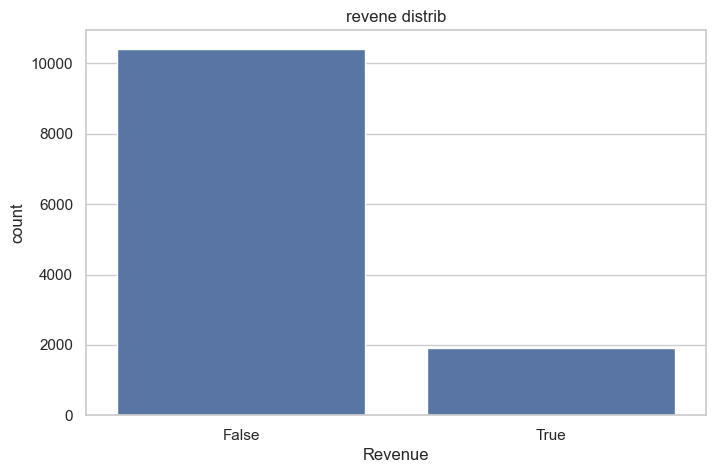

In [15]:
sns.countplot(x='Revenue',data=df)
plt.title('revene distrib')
plt.show()

In [16]:
numerical_duration_cols = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration'
]

In [17]:
numerical_rate_cols = [
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
    
]

In [18]:
count_cols = [
    'Administrative',
    'ProductRelated',
    'Informational'
    
    
]

In [19]:
categorical_cols = ['Month', 'VisitorType']

In [20]:
techincal_cots = [
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType'
]

In [21]:
binary_cols = ['Weekend']

In [22]:
df[numerical_duration_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.0000,7.500000,93.256250,3398.75000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.0000,0.000000,0.000000,2549.37500
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223


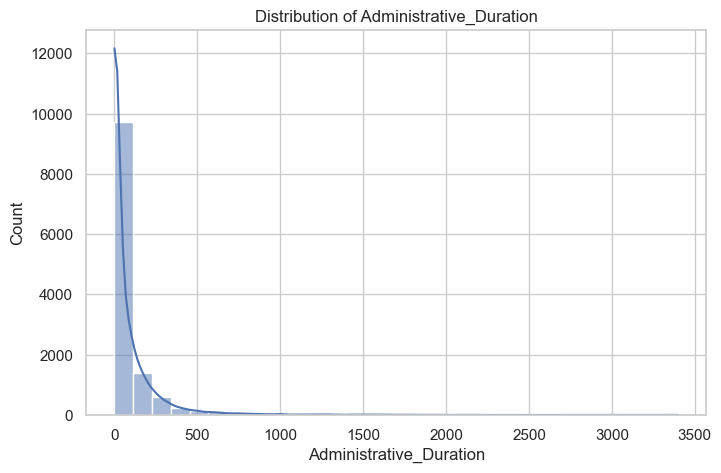

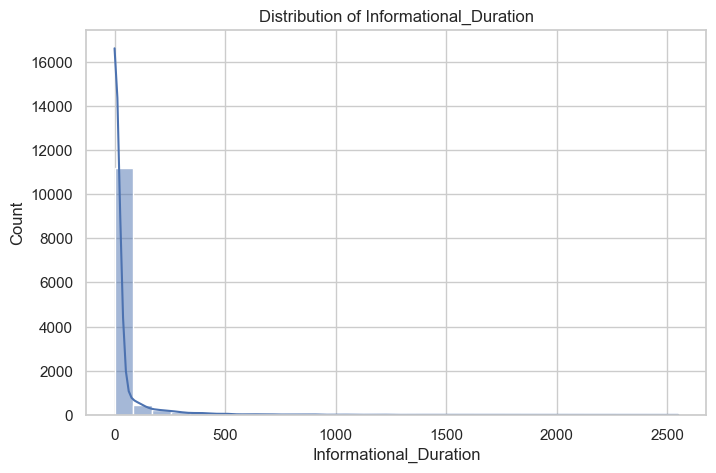

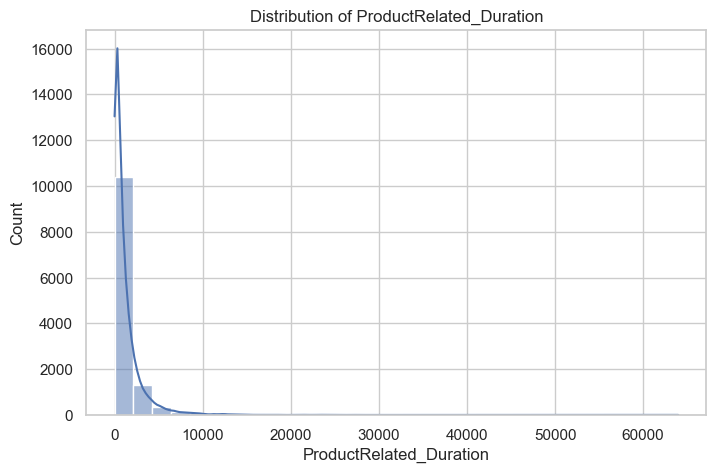

In [23]:
for col in numerical_duration_cols:
    sns.histplot(df[col], bins =30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [25]:
df[numerical_rate_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


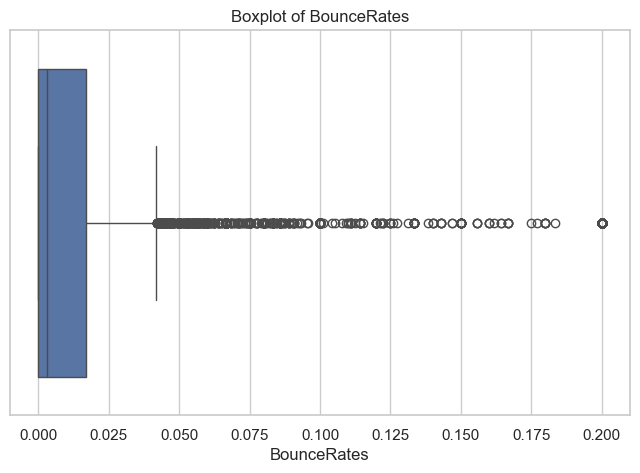

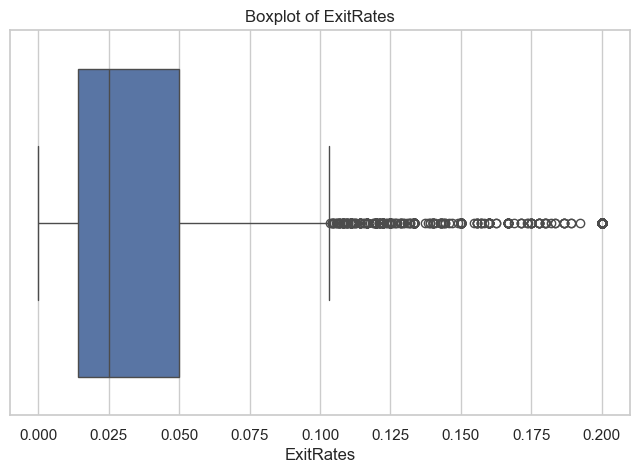

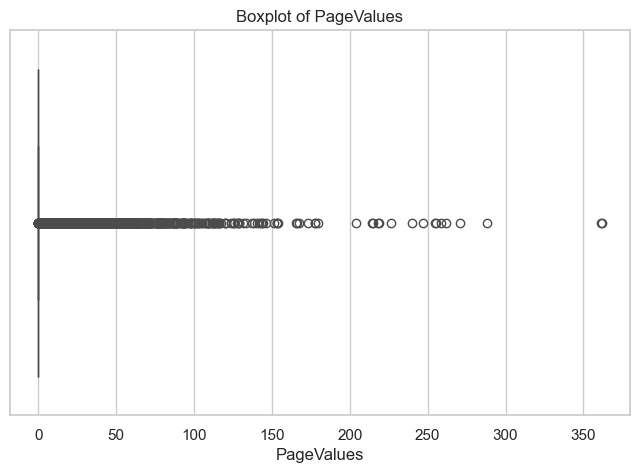

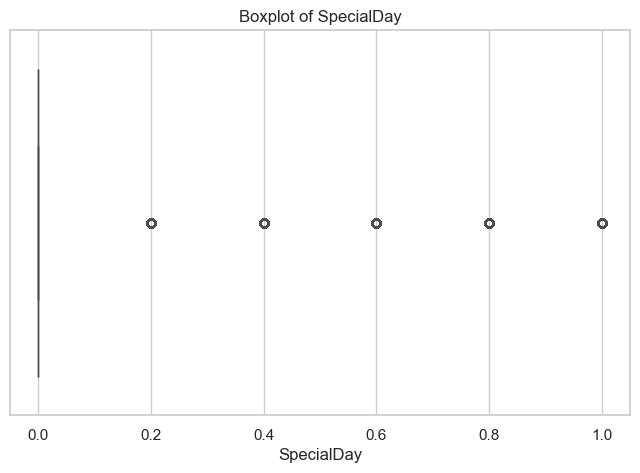

In [27]:
for col in numerical_rate_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [28]:
df.groupby('Revenue')[numerical_duration_cols + numerical_rate_cols].mean().T

Revenue,False,True
Administrative_Duration,73.740111,119.483244
Informational_Duration,30.236237,57.611427
ProductRelated_Duration,1069.987809,1876.209615
BounceRates,0.025317,0.005117
ExitRates,0.047378,0.019555
PageValues,1.975998,27.264518
SpecialDay,0.068432,0.023166


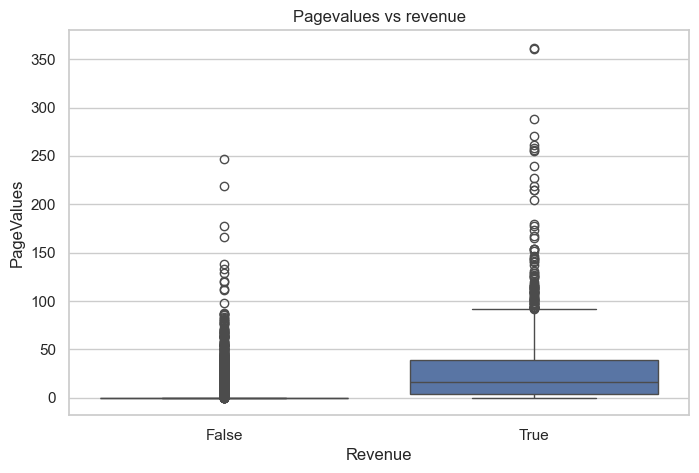

In [29]:
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title('Pagevalues vs revenue')
plt.show()

In [30]:
df.groupby('Revenue')[count_cols].mean().T

Revenue,False,True
Administrative,2.117732,3.393606
ProductRelated,28.714642,48.210168
Informational,0.451833,0.786164


In [31]:
df.groupby('VisitorType')['Revenue'].mean()

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64

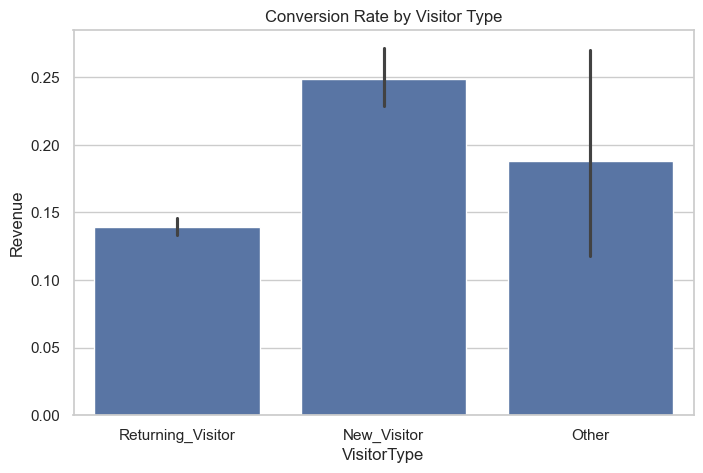

In [32]:
sns.barplot(
    x='VisitorType',
    y='Revenue',
    data=df,
    estimator = np.mean
)
plt.title('Conversion Rate by Visitor Type')
plt.show()

In [33]:
month_conv = df.groupby('Month')['Revenue'].mean().sort_values(ascending=False)

In [34]:
month_conv

Month
Nov     0.253502
Oct     0.209472
Sep     0.191964
Aug     0.175520
Jul     0.152778
Dec     0.125072
May     0.108502
June    0.100694
Mar     0.100682
Feb     0.016304
Name: Revenue, dtype: float64

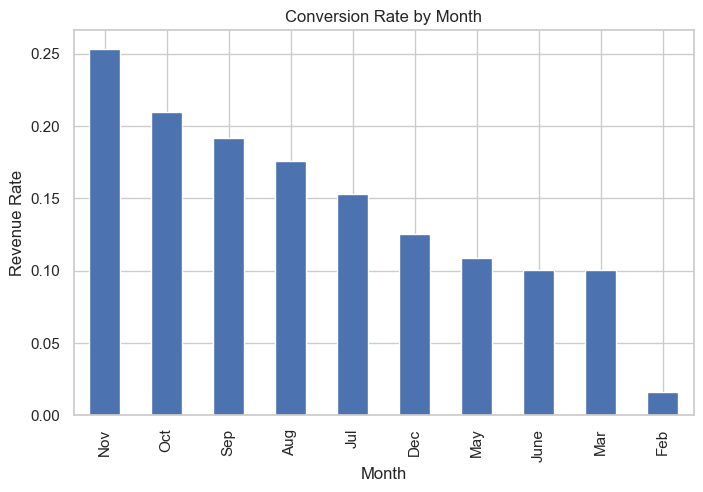

In [35]:
month_conv.plot(kind='bar')
plt.title('Conversion Rate by Month')
plt.ylabel('Revenue Rate')
plt.show()

In [36]:
corr = df[numerical_duration_cols + numerical_rate_cols + count_cols].corr()

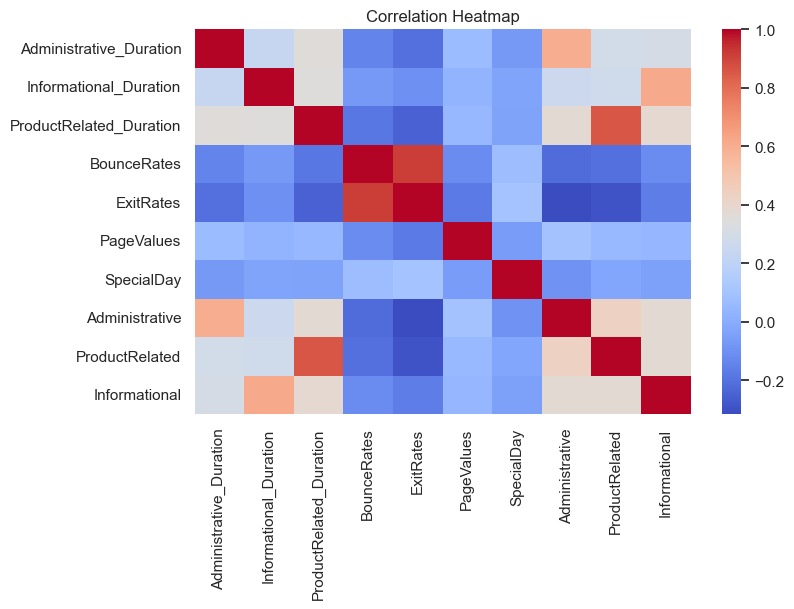

In [38]:
sns.heatmap(corr, cmap='coolwarm', annot =False)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df.groupby('Revenue')['PageValues'].mean()

Revenue
False     1.975998
True     27.264518
Name: PageValues, dtype: float64

### Key EDA Insights

1. Conversion is associated with higher engagement and longer product interaction.
2. New_Visitor sessions show higher conversion rates than Returning_Visitor,suggesting that first-time visits may coincide with purchase intent in this dataset.
3. PageValues is a strong predictor but poses leakage risk.
4. Duration features are heavily right-skewed.
5. Seasonal effects influence conversion behavior.
